# Image Classification with CNN for Malaria Data

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

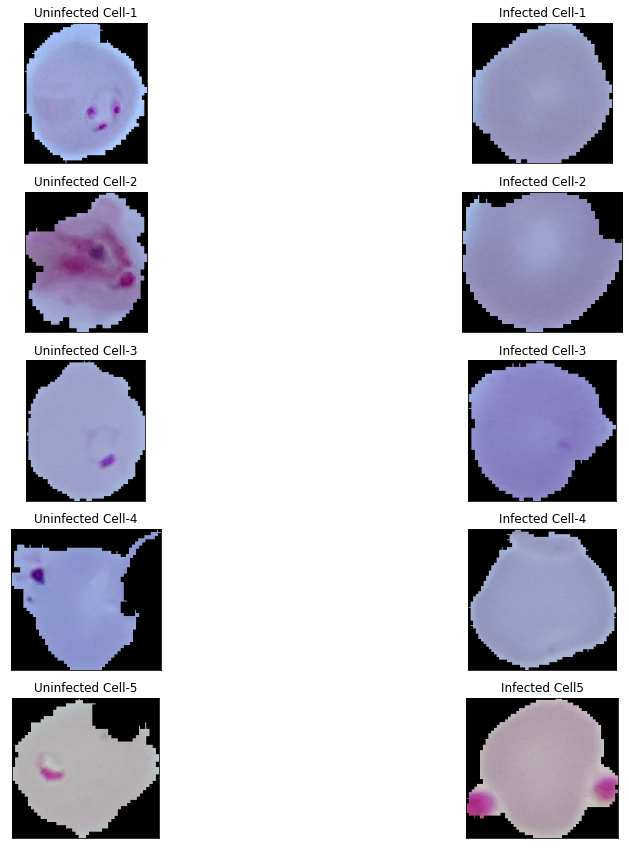

In [19]:
Uninfected='../Image Classification with CNN for Malaria Data/cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png'
Uninfected1='../Image Classification with CNN for Malaria Data/cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_15.png'
Uninfected2='../Image Classification with CNN for Malaria Data/cell_images/Uninfected/C79P40ThinF_IMG_20150817_104745_cell_23.png'
Uninfected3='../Image Classification with CNN for Malaria Data/cell_images/Uninfected/C125P86ThinF_IMG_20151004_102132_cell_98.png'
Uninfected4='../Image Classification with CNN for Malaria Data/cell_images/Uninfected/C216ThinF_IMG_20151106_135228_cell_220.png'
Parasitized='../Image Classification with CNN for Malaria Data/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'
Parasitized1='../Image Classification with CNN for Malaria Data/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_105102_cell_96.png'
Parasitized2='../Image Classification with CNN for Malaria Data/cell_images/Parasitized/C91P52ThinF_IMG_20150821_123314_cell_207.png'
Parasitized3='../Image Classification with CNN for Malaria Data/cell_images/Parasitized/C137P98ThinF_IMG_20151005_162348_cell_2.png'
Parasitized4='../Image Classification with CNN for Malaria Data/cell_images/Parasitized/C180P141NThinF_IMG_20151201_164714_cell_169.png'

fig=plt.figure(figsize = (15 , 15))
ax=fig.add_subplot(5,2,1)
ax.imshow(cv2.imread(Parasitized))
ax.set_title('Uninfected Cell-1')
ax.set_xticks([]) , ax.set_yticks([])

bx=fig.add_subplot(5,2,2)
bx.imshow(cv2.imread(Uninfected))
bx.set_title('Infected Cell-1')
bx.set_xticks([]) , bx.set_yticks([])

cx=fig.add_subplot(5,2,3)
cx.imshow(cv2.imread(Parasitized1))
cx.set_title('Uninfected Cell-2')
cx.set_xticks([]) , cx.set_yticks([])

dx=fig.add_subplot(5,2,4)
dx.imshow(cv2.imread(Uninfected1))
dx.set_title('Infected Cell-2')
dx.set_xticks([]) , dx.set_yticks([])

ex=fig.add_subplot(5,2,5)
ex.imshow(cv2.imread(Parasitized2))
ex.set_title('Uninfected Cell-3')
ex.set_xticks([]) , ex.set_yticks([])

fx=fig.add_subplot(5,2,6)
fx.imshow(cv2.imread(Uninfected2))
fx.set_title('Infected Cell-3')
fx.set_xticks([]) , fx.set_yticks([])

gx=fig.add_subplot(5,2,7)
gx.imshow(cv2.imread(Parasitized3))
gx.set_title('Uninfected Cell-4')
gx.set_xticks([]) , gx.set_yticks([])

ix=fig.add_subplot(5,2,8)
ix.imshow(cv2.imread(Uninfected3))
ix.set_title('Infected Cell-4')
ix.set_xticks([]) , ix.set_yticks([])

jx=fig.add_subplot(5,2,9)
jx.imshow(cv2.imread(Parasitized4))
jx.set_title('Uninfected Cell-5')
jx.set_xticks([]) , jx.set_yticks([])

kx=fig.add_subplot(5,2,10)
kx.imshow(cv2.imread(Uninfected4))
kx.set_title('Infected Cell5')
kx.set_xticks([]) , kx.set_yticks([])

plt.show()

In [20]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)
width, height = 128,128
trainDatagen = datagen.flow_from_directory(directory='../Image Classification with CNN for Malaria Data/cell_images/',
                                           target_size=(width,height), class_mode = 'binary', batch_size = 16, 
                                           subset='training')

valDatagen = datagen.flow_from_directory(directory='../Image Classification with CNN for Malaria Data/cell_images/',
                                           target_size=(width,height), class_mode = 'binary', batch_size = 16,
                                           subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


# Classification

In [24]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 30, 30, 32)       

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit_generator(generator = trainDatagen, steps_per_epoch = len(trainDatagen), epochs =20, validation_data = valDatagen,
                              validation_steps=len(valDatagen))

Epoch 1/20


C:\Users\mehme\AppData\Local\Temp\ipykernel_1008\3935095202.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = trainDatagen, steps_per_epoch = len(trainDatagen), epochs =20, validation_data = valDatagen,


1378/1378 [==============================] - 165s 119ms/step - loss: 0.3886 - accuracy: 0.8130 - val_loss: 0.1759 - val_accuracy: 0.9417
Epoch 2/20
1378/1378 [==============================] - 109s 79ms/step - loss: 0.1622 - accuracy: 0.9525 - val_loss: 0.1609 - val_accuracy: 0.9456
Epoch 3/20
1378/1378 [==============================] - 107s 78ms/step - loss: 0.1464 - accuracy: 0.9551 - val_loss: 0.1662 - val_accuracy: 0.9428
Epoch 4/20
1378/1378 [==============================] - 106s 77ms/step - loss: 0.1394 - accuracy: 0.9567 - val_loss: 0.1796 - val_accuracy: 0.9403
Epoch 5/20
1378/1378 [==============================] - 106s 77ms/step - loss: 0.1340 - accuracy: 0.9584 - val_loss: 0.1643 - val_accuracy: 0.9461
Epoch 6/20
1378/1378 [==============================] - 106s 77ms/step - loss: 0.1321 - accuracy: 0.9581 - val_loss: 0.1643 - val_accuracy: 0.9452
Epoch 7/20
1378/1378 [==============================] - 107s 78ms/step - loss: 0.1230 - accuracy: 0.9601 - val_loss: 0.1580 - va

In [26]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.388553,0.813044,0.175857,0.941742
1,0.162222,0.952513,0.160884,0.945554
2,0.146398,0.955053,0.166191,0.942831
3,0.139397,0.956731,0.179558,0.940290
4,0.133965,0.958409,0.164252,0.946098
5,0.132068,0.958137,0.164255,0.945191
6,0.123001,0.960132,0.158011,0.948276
7,0.125223,0.960314,0.161638,0.947731
8,0.118895,0.961584,0.169554,0.942650
9,0.116235,0.961493,0.175708,0.939564


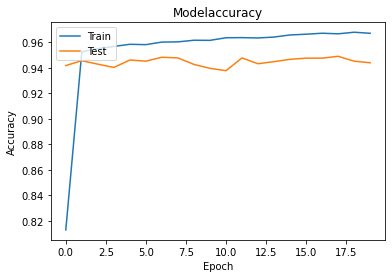

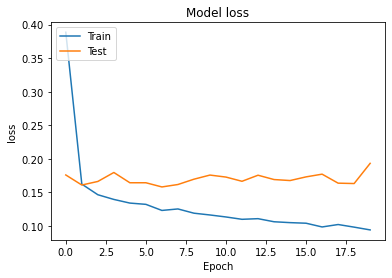

In [28]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()